In [1]:
import cv2
import numpy as np
import pandas as pd
from scipy.sparse import coo_array
import matplotlib.pyplot as plt

In [2]:
spacia_metadata = pd.read_csv('spacia_metadata.sub.txt',index_col=0)
spacia_metadata = spacia_metadata[spacia_metadata['spot_class']!= 'reject']
spacia_metadata

,orig.ident,nCount_RNA,nFeature_RNA,orig.ident.1,x,y,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,spot_class,first_type,second_type,first_class,second_class,min_score,singlet_score,conv_all,conv_doublet
10093173149050,lung,658,297,sample,2350,3450,0.607903,2358,465,4,4,singlet,ST_1,Monocyte,False,False,451.005245,461.896302,True,True
10093173149300,lung,506,207,sample,2350,3700,0.790514,2322,441,4,4,singlet,ST_1,NK,False,False,343.938830,350.728048,True,True
10093173149350,lung,638,269,sample,2350,3750,1.880878,2392,448,4,4,singlet,ST_1,Macrophage,False,False,385.125978,399.199800,True,True
10093173149550,lung,399,216,sample,2350,3950,0.250627,2220,495,3,3,singlet,ST_1,Macrophage,False,False,281.776425,297.579376,True,True
10093173149750,lung,694,281,sample,2350,4150,0.432277,2382,453,3,3,singlet,ST_1,2,False,False,433.210286,433.841148,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50465865736900,lung,834,378,sample,11750,8900,0.839329,2146,463,3,3,doublet_uncertain,ST_Fibroblast,1,False,False,511.244540,673.198096,True,True
50465865736950,lung,837,400,sample,11750,8950,0.358423,2142,490,5,5,singlet,ST_1,4,False,False,513.191100,513.757644,True,True
50465865737000,lung,919,401,sample,11750,9000,0.544070,2184,480,3,3,doublet_uncertain,ST_endothelial,1,False,False,550.068283,725.914182,True,True
50465865737050,lung,650,298,sample,11750,9050,0.000000,2196,450,4,4,singlet,ST_1,NK,False,False,393.079758,397.591822,True,True


In [3]:
_cols = spacia_metadata['x'].to_numpy()
_rows = spacia_metadata['y'].to_numpy()
_cnt = spacia_metadata['first_type'].astype(bool).astype(int).to_numpy()
cnt = coo_array((_cnt, (_rows//50, _cols//50*1)), shape=(max(_rows//50)+1, max(_cols//50)+1))
image = (cnt.toarray() * 255).astype(np.uint8)
# plt.imshow(image, cmap='gray')
success, buffer = cv2.imencode('.png', image)
image = cv2.imdecode(buffer, cv2.IMREAD_UNCHANGED)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
edge = cv2.Canny(blurred, 500, 550)  
print(edge.shape)

edge[120][190:236] = 255
edge[0:30,0:236] = 0
edge[208:216,0:236] = 0
edge[0:216,0:60] = 0
edge[0:216,229:236] = 0


(216, 236)


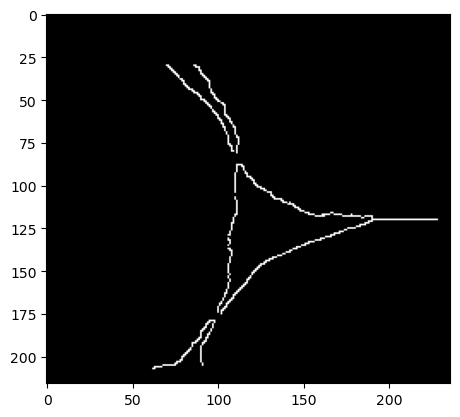

In [4]:
plt.imshow(edge, cmap='gray')

In [5]:
import numpy as np

# 示例二维数组
arr = edge

# 获取非零元素的坐标
coords = np.argwhere(arr != 0)

df = pd.DataFrame(coords, columns=["Row", "Column"])
df['Row'] = df['Row']# * 50
df['Column'] = df['Column']# * 50
print(df)


     Row  Column
0     30      70
1     30      71
2     30      86
3     30      87
4     31      71
..   ...     ...
619  206      65
620  206      66
621  206      67
622  207      62
623  207      63

[624 rows x 2 columns]


In [6]:
coords

array([[ 30,  70],
       [ 30,  71],
       [ 30,  86],
       ...,
       [206,  67],
       [207,  62],
       [207,  63]], shape=(624, 2))

In [7]:
max(spacia_metadata['y']/50)

215.0

In [8]:
distances_all = []
for i in range(0,29510):
    point = np.array([int(spacia_metadata.iloc[i,5])/50,int(spacia_metadata.iloc[i,4])/50])  
    other_points = coords
    distances = np.linalg.norm(other_points - point, axis=1)
    min_distance = float(np.min(distances))
    distances_all.append(min_distance)

In [9]:
spacia_metadata['distances'] = distances_all

In [10]:
import seaborn as sns

In [11]:
custom_palette = {
    '1':'#a6cee3',
    '2':'#54278f',
    '3':'#e7298a',
    '4':'#1f77b4',
    '5':'#f0f0f0',
    'Fibroblast':'green',
    'endothelial':'#f0f0f0',
    'Monocyte':'#f0f0f0',
    'DC':'#f0f0f0',
    'Macrophage':'yellow',
    'Neutrophil':'#f0f0f0',
    'Mast_cell':'#f0f0f0',
    'NK':'#f0f0f0',
    'T_cell':'red',
    'Macro_Apoe':'#A5B55D',
    'Macro_Mt1':'#FD763F',
        'ST_1':'#a6cee3',
    'ST_2':'#54278f',
    'ST_3':'#e7298a'
 
}

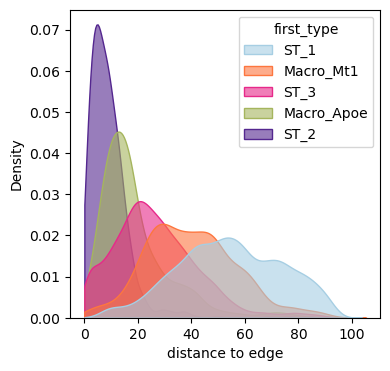

In [14]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(4, 4)
sns.kdeplot(data=spacia_metadata[spacia_metadata["first_type"].isin(['Macro_Apoe','Macro_Mt1','ST_1','ST_2','ST_3'])], x="distances", hue="first_type", fill=True, common_norm=False,alpha=0.6,palette=custom_palette,clip=(0, None))
plt.xlabel('distance to edge')
plt.savefig('BL_Macro_subtype_to_tumor_boundary_stat.pdf')
plt.show()
